In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(-90,90, size = 1500)
lngs = np.random.uniform(-180,180, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
from citipy import citipy

In [4]:
# add the latitudes and longitudes fo a list
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []

#Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it tot he cities list.
    if city not in cities:
        cities.append(city)
        
#Print the city count to confirm sufficient count
len(cities)


622

In [6]:
import requests
from config import weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [7]:
# Create an empty list ot hold the weather data.
city_data = []

#Print the beginning of the logging
print("Beginning Data Retrieval       ")
print("-------------------------------")

#Create counters
record_count = 1
set_count = 1

#Loop through the list of cities and build the city URL
#Loop thorugh all the cities in our list
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for loggin purposes
    if(i % 50 == 0 and i>= 50):
        set_count +=1
        record_count =1
        time.sleep(60)
        
        
    #Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    #Log the URL, record, and set numbers and the city
    print(f'Processing Record {record_count} of Set {set_count}| {city}')
    
    #Add 1 to the record count
    record_count +=1
    
#Run an API request for each of the cities
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        #Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        #Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        #Append the city information into city_data list
        city_data.append({"City": city.title(),
                          "Country": city_country,
                          "Date": city_date,
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind})
        
#If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data loading is complete

print("-------------------------------")
print("Data Retrieval Complete        ")
print("-------------------------------")
        

Beginning Data Retrieval       
-------------------------------
Processing Record 1 of Set 1| marrakesh
Processing Record 2 of Set 1| west bay
Processing Record 3 of Set 1| avarua
Processing Record 4 of Set 1| sao jose da coroa grande
Processing Record 5 of Set 1| tumannyy
City not found. Skipping...
Processing Record 6 of Set 1| barbar
City not found. Skipping...
Processing Record 7 of Set 1| qaanaaq
Processing Record 8 of Set 1| kabanjahe
Processing Record 9 of Set 1| leningradskiy
Processing Record 10 of Set 1| bambous virieux
Processing Record 11 of Set 1| busselton
Processing Record 12 of Set 1| port elizabeth
Processing Record 13 of Set 1| constitucion
Processing Record 14 of Set 1| ballina
Processing Record 15 of Set 1| arlit
Processing Record 16 of Set 1| bhola
Processing Record 17 of Set 1| hilo
Processing Record 18 of Set 1| vaini
Processing Record 19 of Set 1| new norfolk
Processing Record 20 of Set 1| juifang
City not found. Skipping...
Processing Record 21 of Set 1| mokhso

Processing Record 42 of Set 4| hofn
Processing Record 43 of Set 4| upata
Processing Record 44 of Set 4| la libertad
Processing Record 45 of Set 4| salekhard
Processing Record 46 of Set 4| bremerton
Processing Record 47 of Set 4| pedernales
Processing Record 48 of Set 4| leisure city
Processing Record 49 of Set 4| san bartolome
Processing Record 50 of Set 4| mao
Processing Record 1 of Set 5| kokopo
Processing Record 2 of Set 5| cayenne
Processing Record 3 of Set 5| aranos
Processing Record 4 of Set 5| ko samui
Processing Record 5 of Set 5| yarkovo
Processing Record 6 of Set 5| virginia beach
Processing Record 7 of Set 5| vao
Processing Record 8 of Set 5| udaipura
Processing Record 9 of Set 5| adrar
Processing Record 10 of Set 5| le vauclin
Processing Record 11 of Set 5| ilulissat
Processing Record 12 of Set 5| saint-georges
Processing Record 13 of Set 5| talnakh
Processing Record 14 of Set 5| constantine
Processing Record 15 of Set 5| pangoa
Processing Record 16 of Set 5| koungou
Proces

Processing Record 38 of Set 8| placido de castro
Processing Record 39 of Set 8| ola
Processing Record 40 of Set 8| miles city
Processing Record 41 of Set 8| thinadhoo
Processing Record 42 of Set 8| coos bay
Processing Record 43 of Set 8| jinchang
Processing Record 44 of Set 8| grand-lahou
Processing Record 45 of Set 8| karasjok
Processing Record 46 of Set 8| formosa
Processing Record 47 of Set 8| jilmah
City not found. Skipping...
Processing Record 48 of Set 8| lingao
Processing Record 49 of Set 8| balad
Processing Record 50 of Set 8| sibu
Processing Record 1 of Set 9| grand river south east
City not found. Skipping...
Processing Record 2 of Set 9| yendi
Processing Record 3 of Set 9| sayyan
Processing Record 4 of Set 9| acapulco
Processing Record 5 of Set 9| saskatoon
Processing Record 6 of Set 9| chitral
Processing Record 7 of Set 9| niono
Processing Record 8 of Set 9| suntar
Processing Record 9 of Set 9| magadan
Processing Record 10 of Set 9| norman wells
Processing Record 11 of Set 

Processing Record 31 of Set 12| alexandria
Processing Record 32 of Set 12| lai
Processing Record 33 of Set 12| saint anthony
Processing Record 34 of Set 12| paita
Processing Record 35 of Set 12| humberto de campos
Processing Record 36 of Set 12| esmeraldas
Processing Record 37 of Set 12| huarmey
Processing Record 38 of Set 12| saint-paul
Processing Record 39 of Set 12| iskateley
Processing Record 40 of Set 12| monrovia
Processing Record 41 of Set 12| tura
Processing Record 42 of Set 12| kuah
Processing Record 43 of Set 12| surab
Processing Record 44 of Set 12| dibaya
City not found. Skipping...
Processing Record 45 of Set 12| baykalovo
Processing Record 46 of Set 12| chengde
Processing Record 47 of Set 12| chapais
Processing Record 48 of Set 12| rudarpur
Processing Record 49 of Set 12| tobol
Processing Record 50 of Set 12| ronne
Processing Record 1 of Set 13| san policarpo
Processing Record 2 of Set 13| boca do acre
Processing Record 3 of Set 13| itapirapua
Processing Record 4 of Set 1

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Marrakesh,MA,2022-10-25 00:31:04,31.6315,-8.0083,73.47,28,0,2.30
1,West Bay,KY,2022-10-25 00:31:04,19.3667,-81.4167,84.27,80,20,9.22
2,Avarua,CK,2022-10-25 00:31:05,-21.2078,-159.7750,75.25,78,75,11.50
3,Sao Jose Da Coroa Grande,BR,2022-10-25 00:31:05,-8.8978,-35.1478,76.68,83,13,11.36
4,Qaanaaq,GL,2022-10-25 00:31:06,77.4840,-69.3632,16.59,73,99,8.05
5,Kabanjahe,ID,2022-10-25 00:31:06,3.1001,98.4908,67.75,85,100,1.48
6,Leningradskiy,RU,2022-10-25 00:31:07,69.3833,178.4167,9.09,92,50,4.76
7,Bambous Virieux,MU,2022-10-25 00:28:07,-20.3428,57.7575,70.21,83,40,4.61
8,Busselton,AU,2022-10-25 00:27:53,-33.6500,115.3333,59.14,69,98,11.25
9,Port Elizabeth,ZA,2022-10-25 00:31:08,-33.9180,25.5701,67.32,97,100,16.11


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


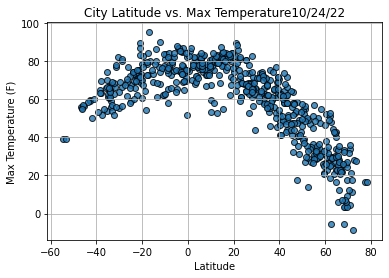

In [11]:
# Import the time module

import time

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats, max_temps, edgecolor = "black", linewidths=1, marker="o", alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature' + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig1.png")

#show plot
plt.show()

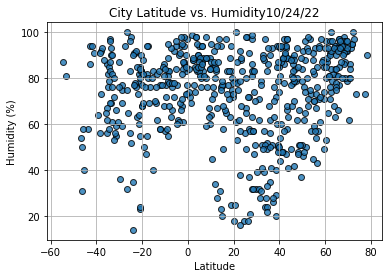

In [12]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(lats, humidity, edgecolor = "black", linewidths=1, marker="o", alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity' + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig2.png")

#show plot
plt.show()

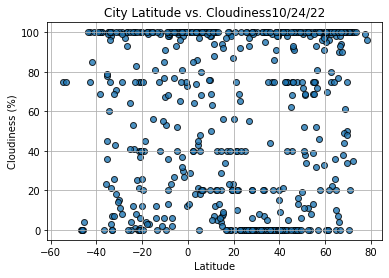

In [13]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(lats, cloudiness, edgecolor = "black", linewidths=1, marker="o", alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness' + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig3.png")

#show plot
plt.show()

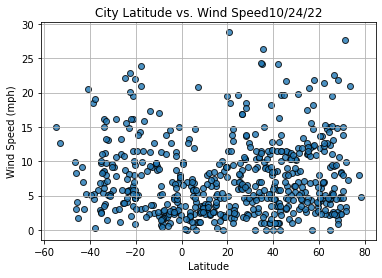

In [14]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(lats, wind_speed, edgecolor = "black", linewidths=1, marker="o", alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed' + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig4.png")

#show plot
plt.show()